## Installing Libreries

In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy.stats import norm
import imblearn
import time
# Maths
import math
from numpy import mean , std
from collections import Counter

In [2]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import category_encoders as ce

In [71]:
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, AllKNN,NeighbourhoodCleaningRule
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN

In [67]:
# Machine Learning
from   sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from   sklearn.impute import SimpleImputer
from   sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict,cross_val_score, RepeatedStratifiedKFold, StratifiedShuffleSplit

from   sklearn.linear_model import LogisticRegression, LinearRegression
from   sklearn.tree import DecisionTreeClassifier
from   sklearn.ensemble import RandomForestClassifier
from   sklearn.svm import SVC
from   sklearn.linear_model import SGDClassifier

from xgboost import XGBClassifier
from   lightgbm import LGBMClassifier
from   sklearn.naive_bayes import GaussianNB
from   sklearn.neighbors import KNeighborsClassifier
#from   imblearn.over_sampling import RandomOverSampler
import pickle

#Clasturing 
from sklearn.cluster import KMeans

# Evalution
from   sklearn.metrics import classification_report, accuracy_score, roc_auc_score, RocCurveDisplay,roc_curve, auc, f1_score
from sklearn.metrics import accuracy_score,multilabel_confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score

#plot_roc_curve has been removed in version 1.2. From 1.2, use RocCurveDisplay instead

In [5]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

# Random State
RANDOM_STATE = 605039 # my loving number

# Data input

In [6]:
df = pd.read_csv("modified_BA_flight_data_15092024.csv", index_col='Unnamed: 0')

In [ ]:
#sns.pairplot(data=df, hue= 'booking_complete' )
#plt.show()

In [7]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,others,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,others,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,others,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,others,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,others,India,1,0,1,5.52,0


# Target variable 

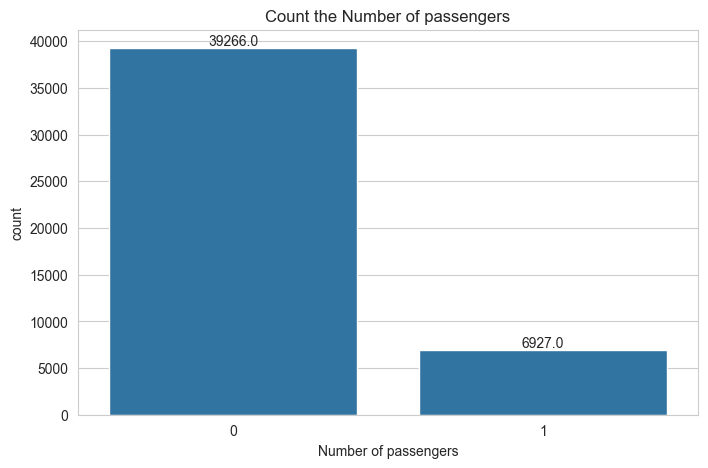

In [8]:
plt.figure(figsize=(8,5))
f = sns.countplot( data = df,x= 'booking_complete')
for p in f.patches:
  f.annotate(format(p.get_height()),
             (p.get_x()+ p.get_width()/2, p.get_height()),
             ha= 'center', va='center',
             xytext=(0,5),
             textcoords = 'offset points'
               )
plt.xlabel("Number of passengers")

plt.title("Count the Number of passengers")
plt.show()

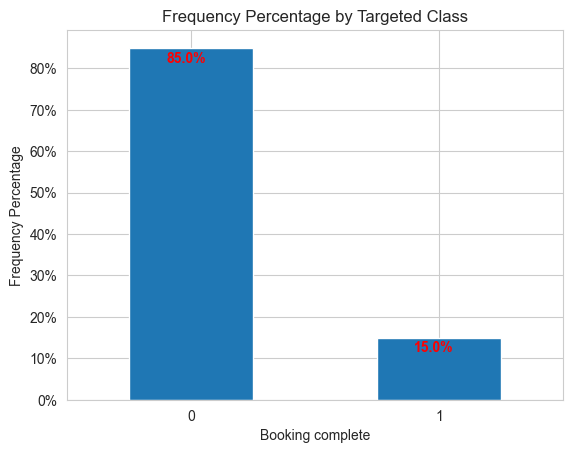

In [9]:
ax = (df['booking_complete'].value_counts() /len(df)*100).plot(kind='bar', stacked = True, rot = 0)
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('Frequency Percentage')
ax.set_xlabel('Booking complete')
ax.set_title('Frequency Percentage by Targeted Class')
totals = []  # list to collect the plt.patches data
# values and append to list
for i in ax.patches:
  totals.append(i.get_width())
total = sum(totals)  # setting individual bar lables using above list
for i in ax.patches:
  ax.text(i.get_x()+.15, i.get_height()-3.5, \
  str(round((i.get_height()/total), 1))+'%', color='red', weight = 'bold')
plt.grid(True)
plt.show()

# 

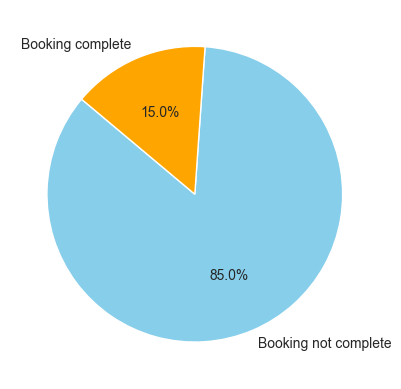

In [10]:
labels=["Booking not complete","Booking complete"]

complete_or_not = df['booking_complete'].value_counts().tolist()
values = [complete_or_not[0],complete_or_not[1]]

fig = plt.pie(x=  df['booking_complete'].value_counts(), labels=labels, startangle=140, autopct='%1.1f%%', colors=["skyblue","orange"], pctdistance=0.6, labeldistance=1.1, radius=1.0)

#fig = plt.pie(values=raw_df['Class'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["skyblue","black"]
plt.title="Fraud vs Genuine transactions"
plt.show()

To deal with the problem of imbalanced data need resampling the data.
Over-Sampling:
In this technique, the minority classes are randomly duplicated in order to match the number of majority classes.

 - The Precision-Recall curve is particularly useful in evaluating models for imbalanced datasets.
- It’s important to note that when resampling the training data, we should never evaluate the model on the resampled data, as it can lead to overfitting to the resampled distribution.


# Define the target 

In [11]:
numeric_features =df.select_dtypes('number').columns
categorical_features = df.select_dtypes('object').columns
print("Numeric_col = ",numeric_features)
print("Catagorical_col =",categorical_features)

Numeric_col =  Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')
Catagorical_col = Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')


In [12]:
# Define the target 
X= df.drop('booking_complete', axis=1)
Y= df['booking_complete']

In [13]:
type(Y)

pandas.core.series.Series

# Workflow

**Workflow with Stratified Splitting**

Step 1: Use stratified train-test split to maintain class proportions

step 2: Encode categorical variables (e.g., One-Hot Encoding, Label Encoding).

Step 3: Check the class distribution in the training set (proportions will be preserved)

Step 4: Apply  oversampling/Under Sampling to only the training set

Step 5: Scale the data using a technique like StandardScaler or MinMaxScaler.

Step 6: Check the new class distribution after oversampling

Step 7: Train the model on the resampled training set

Step 8: Evaluate the model on the original test set


# Data spliting

In imbalanced datasets, oversampling or undersampling should be performed to balace the sample only on the training set after splitting the data, not on the entire dataset. 

In [14]:
split_test_val = StratifiedShuffleSplit(n_splits=1, test_size=0.30, random_state= 39)

In [15]:
split_test_val.split(X,Y)

<generator object BaseShuffleSplit.split at 0x000002401CB52740>

In [16]:
# Check if X and Y are pandas DataFrames
print(type(X), type(Y))

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [17]:
# Using Stratifeid sampling based on booking origin
#stratified splitting, typically stratify based on the target variable 
#70% (train), 15% (validation), and 15% (test)

# 1st split to train and test with validation


split_test = StratifiedShuffleSplit(n_splits=1, train_size=0.7, random_state=42)
for train_index , test_val_index in split_test_val.split(X,Y):
    X_train, X_test_val = X.iloc[train_index], X.iloc[test_val_index]
    Y_train, Y_test_val = Y.iloc[train_index], Y.iloc[test_val_index]
    


In [18]:
# 2nd split to test set to test and validation set
split_val = StratifiedShuffleSplit(n_splits=1, train_size=0.5, random_state=42)
for test_index , val_index in split_val.split(X_test_val,Y_test_val):
    X_test, X_val = X_test_val.iloc[test_index], X_test_val.iloc[val_index]
    Y_test, Y_val = Y_test_val.iloc[test_index], Y_test_val.iloc[val_index]

# Feature Engineering

In [19]:
numeric_features =df.select_dtypes('number').columns
categorical_features = df.select_dtypes('object').columns
print("Numeric_col = ",numeric_features)
print("Catagorical_col =",categorical_features)

Numeric_col =  Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')
Catagorical_col = Index(['sales_channel', 'trip_type', 'route', 'booking_origin'], dtype='object')


## Catagorical encoding

In [20]:
print(df['sales_channel'].unique())
print(df['trip_type'].unique())

['Internet' 'Mobile']
['RoundTrip' 'CircleTrip' 'OneWay']


### OneHot Encoding 

In [21]:
# OneHotEncoder for 'sales_channel' and 'trip_type'
def cat_onehot(train,test,val,column):
    encoder = OneHotEncoder(sparse_output=False, drop='first')  # Use sparse_output=False for dense matrix ; drop='first' to avoid dummy variable trap
    
    # Fit and transform the column
    train_encoded = encoder.fit_transform(train[[column]])
    # transform the test column
    test_encoded = encoder.transform(test[[column]])
    val_encoded = encoder.transform(val[[column]])
    # Create a DataFrame with the encoded values and new column names ## Get feature names from the encoder
    train_encoded_df = pd.DataFrame(train_encoded, columns=encoder.get_feature_names_out([column]))
    test_encoded_df = pd.DataFrame(test_encoded, columns=encoder.get_feature_names_out([column]))
    val_encoded_df = pd.DataFrame(val_encoded, columns=encoder.get_feature_names_out([column]))
    
    # Reset index to match the original data's index
    train_encoded_df.index = train.index
    test_encoded_df.index = test.index
    val_encoded_df.index = val.index
    
    # new column put into main dataset
    train_ = pd.concat([train,train_encoded_df], axis=1)
    test_ = pd.concat([test,test_encoded_df], axis=1)
    val_ = pd.concat([val,val_encoded_df], axis=1)
    # Return the DataFrame with OneHotEncoded columns
    return train_ , test_, val_

In [22]:
# need validation set encoding

In [23]:
X_train, X_test, X_val = cat_onehot(X_train,X_test,X_val,'sales_channel')


In [24]:
X_train, X_test, X_val = cat_onehot(X_train,X_test,X_val,'trip_type')
X_train

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
34305,1,Internet,RoundTrip,45,4,11,2,PENSYD,Australia,0,0,1,8.58,0.0,0.0,1.0
33244,2,Internet,RoundTrip,232,4,6,3,others,Taiwan,0,0,1,4.67,0.0,0.0,1.0
23892,1,Internet,RoundTrip,26,17,11,7,PERTPE,Australia,1,0,0,5.62,0.0,0.0,1.0
44313,1,Internet,RoundTrip,125,6,6,2,DELDPS,India,0,0,1,5.52,0.0,0.0,1.0
17511,1,Internet,RoundTrip,37,29,3,5,KTMMFM,Macau,1,0,1,4.75,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26048,1,Internet,RoundTrip,10,2,14,4,ICNPEN,South Korea,1,0,0,6.62,0.0,0.0,1.0
27049,2,Internet,RoundTrip,48,3,18,4,DMKHND,Thailand,1,1,0,7.57,0.0,0.0,1.0
3774,1,Internet,RoundTrip,22,29,15,4,others,Indonesia,0,0,0,5.07,0.0,0.0,1.0
40057,1,Mobile,RoundTrip,52,5,15,7,KCHPER,Malaysia,1,0,0,5.62,1.0,0.0,1.0


In [25]:
X_val 

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip
2033,2,Internet,RoundTrip,185,30,8,3,AKLKUL,New Zealand,0,0,0,8.83,0.0,0.0,1.0
8554,1,Internet,RoundTrip,83,24,13,3,DELPER,Australia,1,0,0,5.62,0.0,0.0,1.0
11381,1,Internet,RoundTrip,40,21,11,7,others,Australia,1,0,0,8.83,0.0,0.0,1.0
41955,2,Internet,RoundTrip,339,5,6,2,others,China,1,0,0,5.33,0.0,0.0,1.0
12091,1,Internet,RoundTrip,52,18,6,5,HKTOOL,Australia,1,0,0,8.83,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38862,1,Mobile,RoundTrip,11,5,12,5,others,Japan,0,0,1,7.57,1.0,0.0,1.0
26384,1,Internet,RoundTrip,44,2,14,2,PENTPE,Taiwan,0,0,0,4.67,0.0,0.0,1.0
44508,2,Internet,RoundTrip,6,6,8,5,DMKICN,South Korea,0,0,0,6.62,0.0,0.0,1.0
41615,2,Internet,RoundTrip,407,5,15,2,PENTPE,Malaysia,1,1,1,4.67,0.0,0.0,1.0


 Catagorical encoding of High-cardinality categorical variables with many unique categories and large datasets

In [26]:
X_train['route'].nunique()

124

### Frequency encoding

In [27]:

#Frequency encoding is simple and captures how often each category appears in the dataset, which can sometimes correlate with the target in tree-based models.
# Function for frequency encoding with handling for unseen categories
def frequency_encoding(train, test,val, column):
    # Calculate the frequency of each unique value in the 'route' column from the training set
    freq_encoding = train[column].value_counts().to_dict()
    
    # Map the frequencies to the train and test sets
    train[f'{column}_encoded'] = train[column].map(freq_encoding)
    test[f'{column}_encoded'] = test[column].map(freq_encoding)
    val[f'{column}_encoded'] = val[column].map(freq_encoding)
    
    # Handle unseen categories in test set (NaN values) by assigning 0 or a custom value
    test[f'{column}_encoded'].fillna(0, inplace=True)  # Alternatively, you can use train[column].mean() for a more robust fill value.
    val[f'{column}_encoded'].fillna(0, inplace=True)
    
    return train, test, val



In [28]:
# Apply frequency encoding function to X_train and X_test
X_train_encoded, X_test_encoded, X_val_encoded = frequency_encoding(X_train, X_test,X_val,'route')

# Now X_train_encoded and X_test_encoded will have the frequency encoded column 'route_encoded'
print(X_train_encoded[['route', 'route_encoded']].head())


        route  route_encoded
34305  PENSYD            208
33244  others           9924
23892  PERTPE            190
44313  DELDPS            117
17511  KTMMFM            206


In [29]:
X_val_encoded

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded
2033,2,Internet,RoundTrip,185,30,8,3,AKLKUL,New Zealand,0,0,0,8.83,0.0,0.0,1.0,1598
8554,1,Internet,RoundTrip,83,24,13,3,DELPER,Australia,1,0,0,5.62,0.0,0.0,1.0,80
11381,1,Internet,RoundTrip,40,21,11,7,others,Australia,1,0,0,8.83,0.0,0.0,1.0,9924
41955,2,Internet,RoundTrip,339,5,6,2,others,China,1,0,0,5.33,0.0,0.0,1.0,9924
12091,1,Internet,RoundTrip,52,18,6,5,HKTOOL,Australia,1,0,0,8.83,0.0,0.0,1.0,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38862,1,Mobile,RoundTrip,11,5,12,5,others,Japan,0,0,1,7.57,1.0,0.0,1.0,9924
26384,1,Internet,RoundTrip,44,2,14,2,PENTPE,Taiwan,0,0,0,4.67,0.0,0.0,1.0,613
44508,2,Internet,RoundTrip,6,6,8,5,DMKICN,South Korea,0,0,0,6.62,0.0,0.0,1.0,186
41615,2,Internet,RoundTrip,407,5,15,2,PENTPE,Malaysia,1,1,1,4.67,0.0,0.0,1.0,613


In [30]:
X_test_encoded[ X_test_encoded['route_encoded'] == 0]

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded


### Target Encoding

In [31]:
X_train['booking_origin'].nunique()

27

In [32]:
# Target Encoding is the best option for tree-based models when you have a moderate number of categories (like 27). 
# It captures the relationship between the categories and the target variable.

def target_encoding(train, test, val, Y_train, column):
    # Initialize the target encoder
    target_encoder = ce.TargetEncoder(cols=column)

    # Fit the encoder on the training set (using the target variable Y_train)
    train[f'{column}_encoded']  = target_encoder.fit_transform(train[column], Y_train)

    # Apply the encoding to the test set
    test[f'{column}_encoded']  = target_encoder.transform(test[column])
    
    # Apply the encoding to the validetion set
    val[f'{column}_encoded']  = target_encoder.transform(val[column])
    
    return train, test, val

In [33]:
# Apply Target Encoding function to X_train and X_test
# Now X_train_encoded and X_test_encoded will have the frequency encoded column 'booking_origin'

X_train, X_test, X_val = target_encoding(X_train, X_test,X_val, Y_train,'booking_origin')

print(X_train[['booking_origin', 'booking_origin_encoded']].head())

      booking_origin  booking_origin_encoded
34305      Australia                0.047886
33244         Taiwan                0.113235
23892      Australia                0.047886
44313          India                0.111675
17511          Macau                0.312217


In [34]:
print(X_val[['booking_origin', 'booking_origin_encoded']] )

      booking_origin  booking_origin_encoded
2033     New Zealand                0.046400
8554       Australia                0.047886
11381      Australia                0.047886
41955          China                0.206735
12091      Australia                0.047886
...              ...                     ...
38862          Japan                0.125334
26384         Taiwan                0.113235
44508    South Korea                0.098839
41615       Malaysia                0.355506
45444          China                0.206735

[6929 rows x 2 columns]


In [35]:
X_train.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'sales_channel_Mobile',
       'trip_type_OneWay', 'trip_type_RoundTrip', 'route_encoded',
       'booking_origin_encoded'],
      dtype='object')

In [36]:
X_train.drop(['sales_channel', 'trip_type','route','booking_origin'], axis=1,inplace=True)
X_train

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded,booking_origin_encoded
34305,1,45,4,11,2,0,0,1,8.58,0.0,0.0,1.0,208,0.047886
33244,2,232,4,6,3,0,0,1,4.67,0.0,0.0,1.0,9924,0.113235
23892,1,26,17,11,7,1,0,0,5.62,0.0,0.0,1.0,190,0.047886
44313,1,125,6,6,2,0,0,1,5.52,0.0,0.0,1.0,117,0.111675
17511,1,37,29,3,5,1,0,1,4.75,0.0,0.0,1.0,206,0.312217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26048,1,10,2,14,4,1,0,0,6.62,0.0,0.0,1.0,197,0.098839
27049,2,48,3,18,4,1,1,0,7.57,0.0,0.0,1.0,117,0.220490
3774,1,22,29,15,4,0,0,0,5.07,0.0,0.0,1.0,9924,0.256643
40057,1,52,5,15,7,1,0,0,5.62,1.0,0.0,1.0,173,0.355506


In [37]:
X_test.drop(['sales_channel', 'trip_type','route','booking_origin'], axis=1,inplace=True)
X_test

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded,booking_origin_encoded
25997,1,6,2,23,7,0,1,1,7.57,0.0,0.0,1.0,178,0.047886
674,1,237,49,9,7,1,1,1,8.83,0.0,0.0,1.0,1598,0.046400
1561,2,170,39,5,6,1,1,1,8.83,0.0,0.0,1.0,1598,0.355506
30875,1,85,4,7,6,1,0,1,8.83,0.0,0.0,1.0,219,0.047886
12221,1,95,21,10,6,1,0,1,5.62,0.0,0.0,1.0,228,0.047886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31158,2,36,4,1,7,0,0,1,7.57,0.0,0.0,1.0,223,0.125334
16449,1,21,28,1,3,1,0,0,5.00,0.0,0.0,1.0,9924,0.355506
44219,1,74,6,5,4,0,0,1,5.62,0.0,0.0,1.0,9924,0.047886
49794,4,49,6,13,5,1,0,1,4.67,0.0,0.0,1.0,613,0.355506


In [38]:
X_val.drop(['sales_channel', 'trip_type','route','booking_origin'], axis=1,inplace=True)
X_val

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,sales_channel_Mobile,trip_type_OneWay,trip_type_RoundTrip,route_encoded,booking_origin_encoded
2033,2,185,30,8,3,0,0,0,8.83,0.0,0.0,1.0,1598,0.046400
8554,1,83,24,13,3,1,0,0,5.62,0.0,0.0,1.0,80,0.047886
11381,1,40,21,11,7,1,0,0,8.83,0.0,0.0,1.0,9924,0.047886
41955,2,339,5,6,2,1,0,0,5.33,0.0,0.0,1.0,9924,0.206735
12091,1,52,18,6,5,1,0,0,8.83,0.0,0.0,1.0,188,0.047886
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38862,1,11,5,12,5,0,0,1,7.57,1.0,0.0,1.0,9924,0.125334
26384,1,44,2,14,2,0,0,0,4.67,0.0,0.0,1.0,613,0.113235
44508,2,6,6,8,5,0,0,0,6.62,0.0,0.0,1.0,186,0.098839
41615,2,407,5,15,2,1,1,1,4.67,0.0,0.0,1.0,613,0.355506


# Resampling Techniques for Balancing

In [39]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'route',
       'booking_origin', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration', 'booking_complete'],
      dtype='object')

In [76]:
# Resampling techniques used 
TECHNIQUE_NAME =[ 'oversampling', 'undersampling','SMOTE','ADASYN','allknn','NeighbourhoodCleaningRule', 'Tomek Links']

In [81]:
# function for ploting class balance 
def plot_target_balance(y, TECHNIQUE_NAME):
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(ncols = 2, nrows = 2, figsize = (7, 5))
    sns.countplot(x = df['booking_complete'], ax = ax1)
    ax1.set_title("Original Target");
    pd.Series(df['booking_complete']).value_counts().plot.pie(explode = [0, 0], autopct = '%1.2f%%',
                                                     textprops = {'fontsize' : 10}, ax = ax2,
                                                     title = 'Original distribution')
    sns.countplot(x = y, ax = ax3)
    ax3.set_title(f"{TECHNIQUE_NAME} Target");
    pd.Series(y).value_counts().plot.pie(explode = [0, 0], autopct = '%1.2f%%',
                                         textprops = {'fontsize' : 10}, ax = ax4,
                                         title = f"{TECHNIQUE_NAME} distribution")
    ax1.grid(False)
    ax3.grid(False)
    plt.tight_layout()
    plt.show()
    
def plot_scatter(X, y, TECHNIQUE_NAME):
    fig, (ax1, ax2) = plt.subplots(ncols = 2, nrows = 1, sharey = False, figsize = (10, 4))
    sns.scatterplot(data = df, x = 'num_passengers', y = 'flight_duration', hue = 'booking_complete', ax = ax1)
    ax1.set_title("Original distribution")
    sns.scatterplot(data = pd.concat([X,y], axis = 1),
                     x = 'num_passengers', y = 'flight_duration', hue = 'booking_complete',)
    ax1.grid(False)
    ax2.grid(False)
    ax2.set_title(f"{TECHNIQUE_NAME} distribution")
    plt.show()

## Over Sampling

In [43]:
# Check the class distribution in the training set (proportions will be preserved)
print("Original class distribution:", Counter(Y_train))

Original class distribution: Counter({0: 27486, 1: 4849})


In [44]:
# Apply  oversampling Sampling to the training set
# from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')

X_over, y_over = oversample.fit_resample(X_train, Y_train)

In [45]:
# Check the new class distribution after oversampling
print("Ouer Resampled class distribution:", Counter(y_over))

Ouer Resampled class distribution: Counter({0: 27486, 1: 27486})


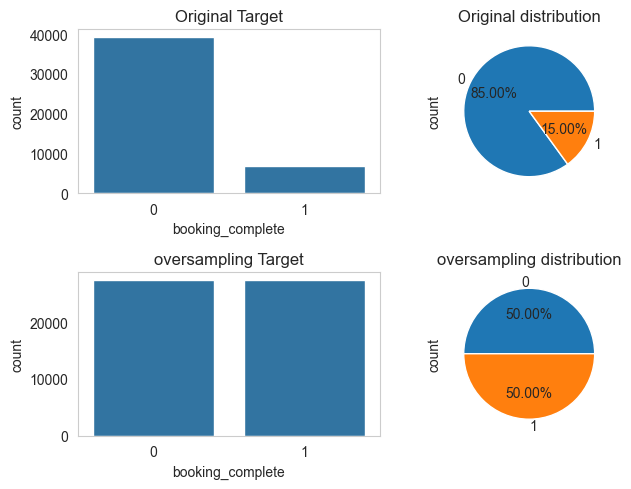

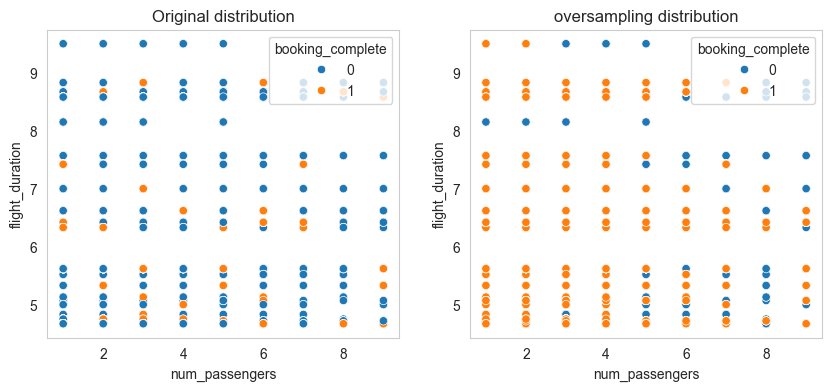

In [46]:
# Visualization of resampling effect
plot_target_balance(y_over, TECHNIQUE_NAME[0])
plot_scatter(X_over, y_over, TECHNIQUE_NAME[0])


## Oversampling: SMOTE

Generating Synthetic Samples: (SMOTE)
SMOTE is an oversampling method. It works by creating synthetic samples from the minor class instead of creating copies.

In [58]:
#from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 123)
X_train_sm,Y_train_sm = sm.fit_resample(X_train, Y_train.ravel())

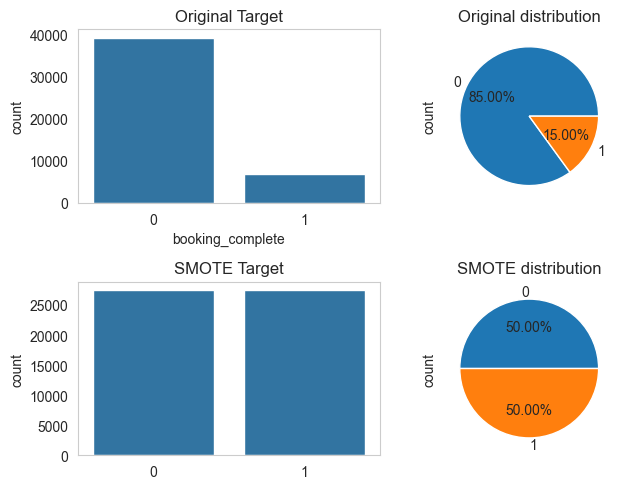

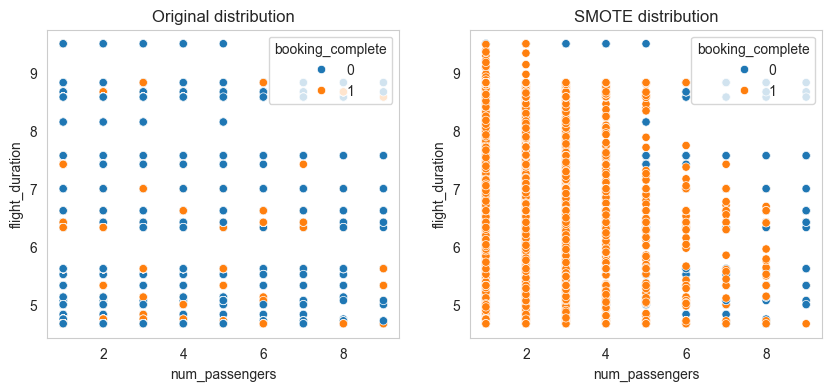

In [59]:
# Visualization of resampling effect
plot_target_balance(Y_train_sm,TECHNIQUE_NAME[2])
# Y_train_res is numpy.ndarray
Y_train_res_df = pd.DataFrame(Y_train_sm, columns=['booking_complete'])
plot_scatter(X_train_sm, Y_train_res_df,TECHNIQUE_NAME[2])

## Oversampling: ADASYN

In [60]:
ada = ADASYN(sampling_strategy = 'auto', random_state = RANDOM_STATE, n_jobs = 4)

X_ada, y_ada = ada.fit_resample(X_train,Y_train)

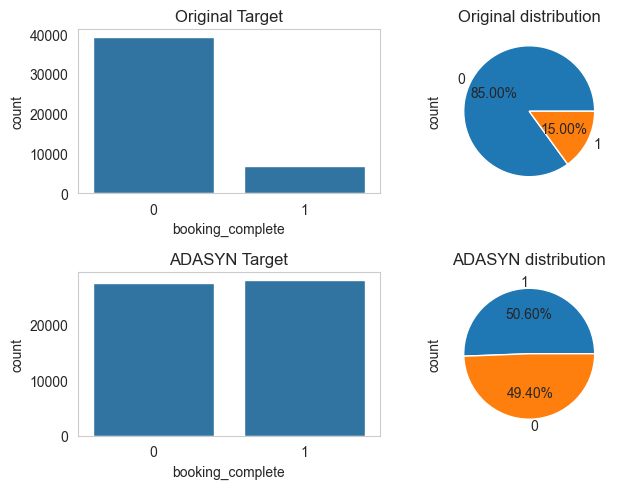

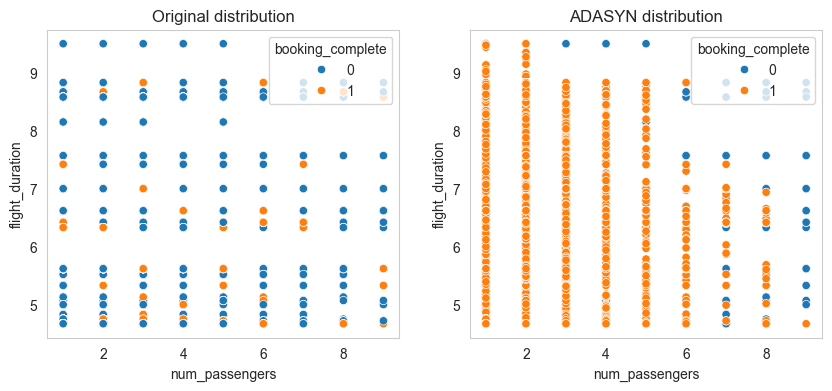

In [61]:
# Visualization of resampling effect
plot_target_balance(y_ada,TECHNIQUE_NAME[3])
# Y_train_res is numpy.ndarray
#Y_train_res_df = pd.DataFrame(Y_train_res, columns=['booking_complete'])
plot_scatter(X_ada, y_ada, TECHNIQUE_NAME[3])

## Under Sampling

Under-Sampling:
In this technique, The majority class are down sampled to the size of minority class by randomly deleting data points from the majority class.

In [51]:
#from imblearn.over_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='auto')

X_under, y_under = undersample.fit_resample(X_train, Y_train)

# Check the new class distribution after oversampling
print("Under Resampled class distribution:", Counter(y_under))

Under Resampled class distribution: Counter({0: 4849, 1: 4849})


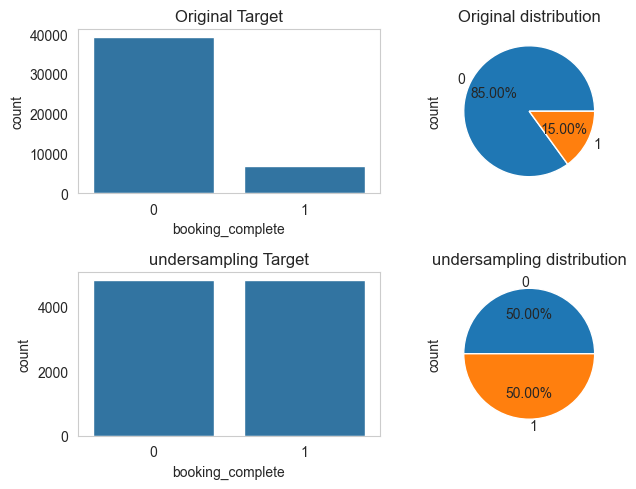

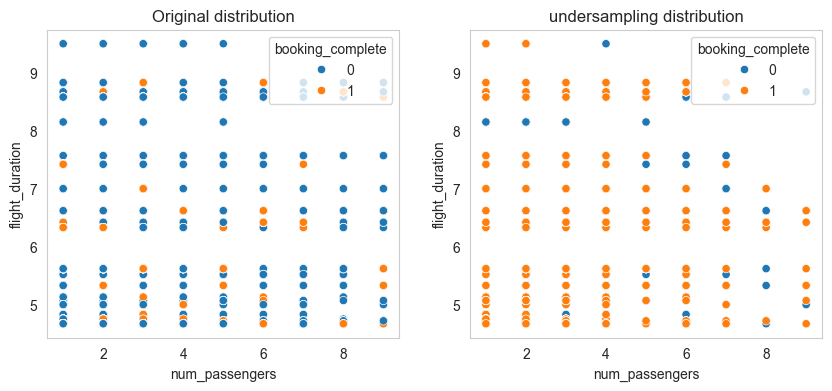

In [52]:
# Visualization of resampling effect
plot_target_balance(y_under, TECHNIQUE_NAME[1])
plot_scatter(X_under, y_under , TECHNIQUE_NAME[1])

## Undersampling: All KNN

All KNN (All k-Nearest Neighbors) is a form of instance selection that involves considering the entire dataset and its nearest neighbors to identify and remove noisy or misclassified instances, thereby enhancing the quality of the training set.

In [53]:


allknn = AllKNN(sampling_strategy = 'auto', kind_sel = 'all',
                n_jobs = -1)

X_allknn , y_allknn  = allknn.fit_resample(X_train, Y_train)

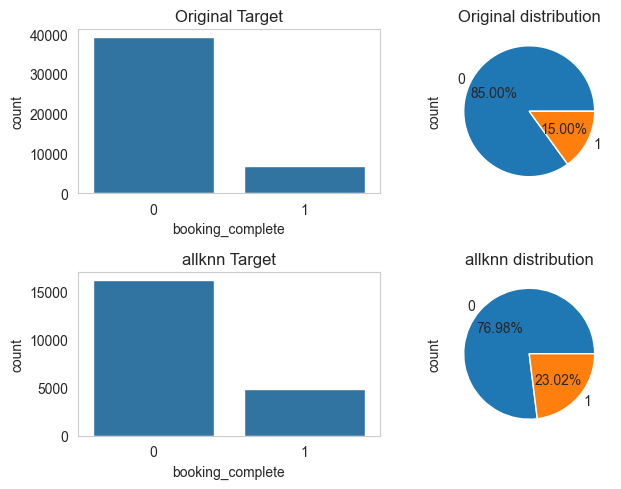

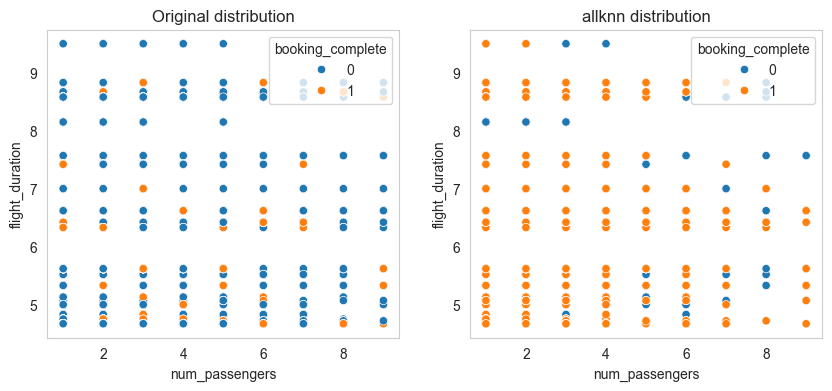

In [54]:
# Visualization of resampling effect
plot_target_balance(y_allknn, TECHNIQUE_NAME[4])
plot_scatter(X_allknn , y_allknn  , TECHNIQUE_NAME[4])

## Undersampling: Neighbourhood Cleaning Rule

NCL is an instance selection method that aims to identify and remove instances that are considered noisy or ambiguous from the dataset, particularly focusing on those instances near class boundaries

In [55]:
ncr = NeighbourhoodCleaningRule(sampling_strategy = 'auto', kind_sel = 'all',
                                n_jobs = -1) 

X_ncr, y_ncr = ncr.fit_resample(X_train, Y_train)

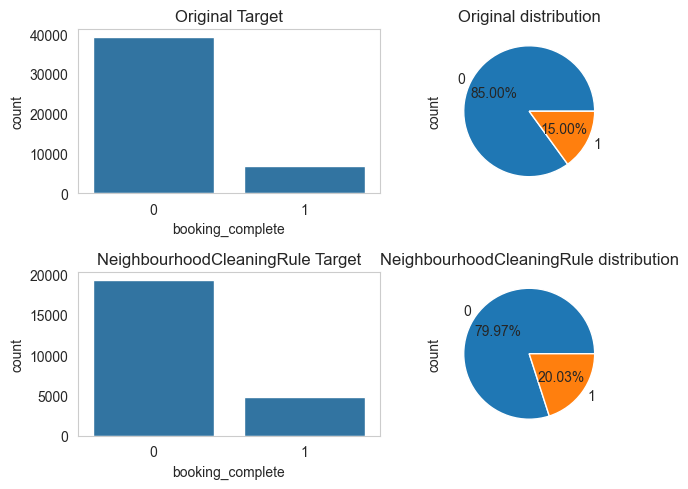

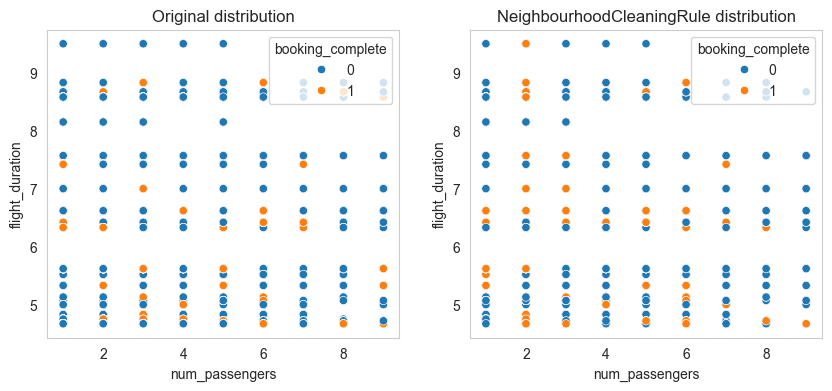

In [56]:
# Visualization of resampling effect
plot_target_balance(y_ncr, TECHNIQUE_NAME[5])
plot_scatter(X_ncr, y_ncr, TECHNIQUE_NAME[5])

## Undersampling: Tomek Links

In [82]:
tl = TomekLinks(sampling_strategy = 'auto', n_jobs = -1)  

X_tl, y_tl = tl.fit_resample(X_train, Y_train)

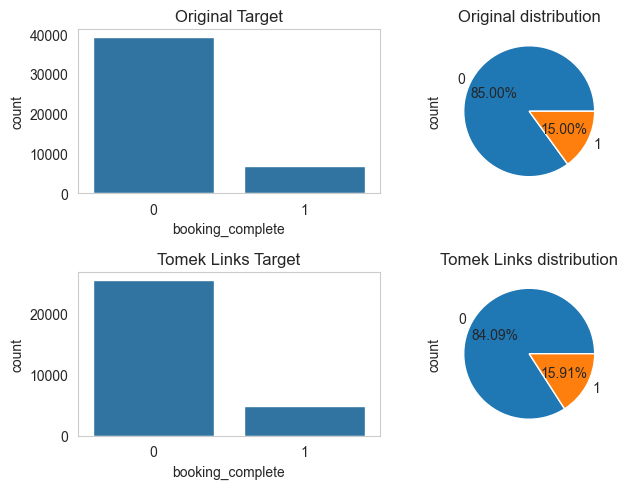

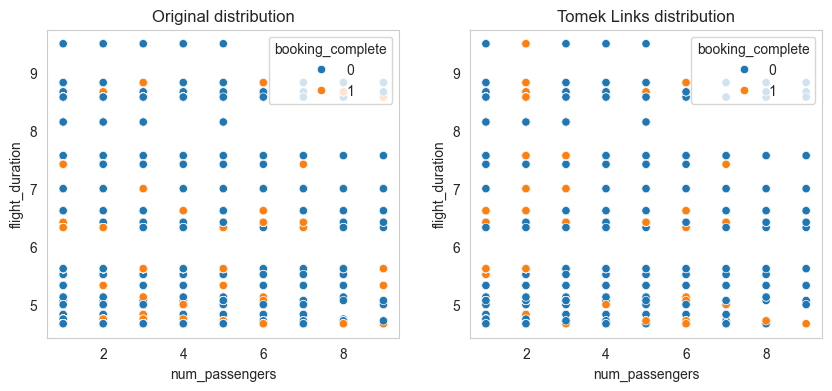

In [83]:
# Visualization of resampling effect
plot_target_balance(y_tl, TECHNIQUE_NAME[6])
plot_scatter(X_tl, y_tl, TECHNIQUE_NAME[6])

# Scalling


- One-hot encoded data: No scaling is needed.
- Numerically encoded categorical data: Apply scaling (e.g., StandardScaler or MinMaxScaler) If use a distance-based or linear model.
- If use a tree-based algorithm, scaling is not necessary.

In [57]:

numeric_features_ = numeric_features.drop('booking_complete')
numeric_features_

Index(['num_passengers', 'purchase_lead', 'length_of_stay', 'flight_hour',
       'flight_day', 'wants_extra_baggage', 'wants_preferred_seat',
       'wants_in_flight_meals', 'flight_duration'],
      dtype='object')

In [ ]:
# Isolated dataset with only numeric coluymns 
X_train_n = X_train[numeric_features_]
X_test_n = X_test[numeric_features_]
X_val_n = X_val[numeric_features_]

In [ ]:
def scale_datasets(scaler, X_tarin, X_test, X_val):
    # Using standard scaling
    # Initialize the scaler
    
    # Fit the scaler on the training set
    scaler.fit(X_tarin)

    # Transform the test and validation sets using the same scaler
    X_train_scaled= scaler.transform( X_tarin)
    X_test_scaled = scaler.transform( X_test)
    X_val_scaled = scaler.transform( X_val )
    
    return X_train_scaled, X_test_scaled, X_val_scaled

scaler = StandardScaler()
)

In [ ]:
# Apply scaling to each resampled dataset
X_over_scaled, X_test_scaled = scale_datasets(scaler, X_over, X_test)
X_train_sm_scaled, _ = scale_datasets(scaler, X_train_sm, X_test)
X_ada_scaled, _ = scale_datasets(scaler, X_ada, X_test)
X_under_scaled, _ = scale_datasets(scaler, X_under, X_test)
X_allknn_scaled, _ = scale_datasets(scaler, X_allknn, X_test)
X_ncr_scaled, _ = scale_datasets(scaler, X_ncr, X_test)

In [ ]:
X_test_scaled

In [ ]:
# Step 4: Convert the scaled arrays back to DataFrames with original column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train_n.columns, index= X_train_n.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test_n.columns, index= X_test_n.index)
X_val_scaled = pd.DataFrame(X_val_scaled, columns= X_val_n.columns, index= X_val_n.index)

In [ ]:
X_test_scaled 

## Concat numerical and categorical data in one Dataframe

In [ ]:
categorical_features

In [ ]:
X_train.columns

In [ ]:
categoricals=['sales_channel_Mobile','trip_type_OneWay', 'trip_type_RoundTrip', 'route_encoded',
       'booking_origin_encoded']

In [ ]:
# Check the shapes
print(X_train_n.shape)  # Shape of the numerical features
print(X_train[categoricals].shape)  # Shape of the categorical features

In [ ]:
X_train_ = pd.concat([X_train_scaled,X_train[categoricals]], axis=1)
X_train_

In [ ]:
# Check the shape of the final DataFrame
print(X_train_.shape)

In [ ]:
X_test_ = pd.concat([X_test_scaled,X_test[categoricals]], axis=1)
X_test_

In [ ]:
# Check the shapes
print(X_val_n.shape)  # Shape of the numerical features
print(X_val[categoricals].shape)  # Shape of the categorical features

# Model

Choose the ML algorithm from 

1. LogisiticRegression
2. DecisionTreeClassifier
3. XGBClassifier
4. LGBMClassifier
5. Support vector Machine
6. Random Forest
7. Support Vector 
8. Naive Bayes
9. Stochastic gradient descent

In [63]:
# Holding arrays
Technique = list()
Type = list()
auc_score = list()
accuracy = list()
precision = list()
recall = list()
f1_Score = list()
training_duration = list()
algorithm_duration = list()

In [64]:
def scale_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

In [65]:
def train_model(X, y):
    model = RandomForestClassifier(random_state = RANDOM_STATE)
    model.fit(X, y)
    return model

In [68]:
def capture_metrics(model, X_test, y_test):
    prediction = model.predict(X_test)
    proba_prediction = model.predict_proba(X_test)
    
    return [roc_auc_score(y_test, proba_prediction[:,1]),
            accuracy_score(y_test, prediction),
           precision_score(y_test, prediction, average = 'binary'),
           recall_score(y_test, prediction, average = 'binary'),
           f1_score(y_test, prediction, average = 'binary')]

In [ ]:
def get_results(X, y, TECHNIQUE_NAME: str, TECHNIQUE_TYPE: str, train_model):
    
    start = time.time()

    print("Training...")
    model = train_model(X_train, y_train)
    
    print("Metrics...")
    metrics = capture_metrics(model, X_test, y_test)
    
    Technique.append(TECHNIQUE_NAME)
    Type.append(TECHNIQUE_TYPE)
    auc_score.append(metrics[0])
    accuracy.append(metrics[1])
    precision.append(metrics[2])
    recall.append(metrics[3])
    f1_Score.append(metrics[4])
    
    print("Complete!")
    
    end = time.time()
    time_taken = end - start
    print(f"Duration: {time_taken}")
    training_duration.append(time_taken)

In [ ]:
# Holding arrays
Technique = list()
Type = list()
auc_score = list()
accuracy = list()
precision = list()
recall = list()
f1_Score = list()
training_duration = list()
algorithm_duration = list()

def split_data(X, y):
    return train_test_split(X, y, test_size = 0.1, random_state = RANDOM_STATE)

def scale_data(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

def train_model(X, y):
    model = RandomForestClassifier(random_state = RANDOM_STATE)
    model.fit(X, y)
    return model

def capture_metrics(model, X_test, y_test):
    prediction = model.predict(X_test)
    proba_prediction = model.predict_proba(X_test)
    
    return [roc_auc_score(y_test, proba_prediction[:,1]),
            accuracy_score(y_test, prediction),
           precision_score(y_test, prediction, average = 'binary'),
           recall_score(y_test, prediction, average = 'binary'),
           f1_score(y_test, prediction, average = 'binary')]
    

def get_results(X, y, TECHNIQUE_NAME: str, TECHNIQUE_TYPE: str):
    
    start = time.time()

    print("Scaling and splitting...")
    X = scale_data(X)
    X_train, X_test, y_train, y_test = split_data(X, y)
    
    print("Training...")
    model = train_model(X_train, y_train)
    
    print("Metrics...")
    metrics = capture_metrics(model, X_test, y_test)
    
    Technique.append(TECHNIQUE_NAME)
    Type.append(TECHNIQUE_TYPE)
    auc_score.append(metrics[0])
    accuracy.append(metrics[1])
    precision.append(metrics[2])
    recall.append(metrics[3])
    f1_Score.append(metrics[4])
    
    print("Complete!")
    
    end = time.time()
    time_taken = end - start
    print(f"Duration: {time_taken}")
    training_duration.append(time_taken)

In [ ]:
# for ML model call
def get_models():
  models = dict()
  models['XGB'] = XGBClassifier()
  models['LGBM'] = LGBMClassifier()
  models['logr'] = LogisticRegression(solver='newton-cholesky', max_iter=1000; class_weight ="balanced") #Assigning Class Weights for imbalance classicication
  models['knn'] = KNeighborsClassifier()
  models['cart']= DecisionTreeClassifier()
  models['rnf'] = RandomForestClassifier()
  models['svc'] = SVC(gamma='auto')
  models['bayes'] = GaussianNB()
  models['SGD'] = SGDClassifier(loss='modified_huber', random_state=42)

  return models

In [ ]:
#Assigning Class Weights Manually: assign higher weights to the minority class so that our model gives equal importance to both the class.
Logistic_model = LogisiticRegression(class_weight =
                                    "balanced").fit(x_train,y_train)

In [ ]:
#class_weights = {class_label : weight}
class_weights = {0:2, 1:1}
Logistic_model = LogisiticRegression(class_weight =
                                 class_weights).fit(x_train,y_train)

## Grid search

We can use grid search to search the optimal weight values for our model training

In [ ]:
from sklearn.model_selection import GridSearchCV
class_weight = np.linespace(0.05, 1.5, 20)
grid_para = {'class_weight' : [{0: x, 1: 1.0-x} for x in 
             class_weight]
gridsearch = GridSearchCV(estimator = LogisticRegression(),
                          param_grid = grid_para,
                          scoring = 'f1',
                          cv = 3)
gridsearch.fit(x_train, y_train)
print(gridsearch.best_params_)

# Model fitting and evaluation